## Devoir de la Chimie Quantique sur la molécule de 1,2-Thiazole

### Présentation de la molécule

La molécule 1,2-Thiazole a :
- Formule brute : $ C_{3}H_{3}NS $ ,
- Masse molaire moléculaire : 85.13g/mol ,
- Intéret : cette molécule possède des propriétés physico-chimique unique qui entrent dans divers domaines scientifiques. \
  Elle peut être utilisée comme réactif pour introduire la fonctionnalité du thiazole dans une variété de molécules, ce qui permet d'obtenir de nouveaux composés aux propriétés spécifiques. Le thiazole est un composé aromatique constitué d'un atome de soufre et d'un atome d'azote. Il est connu pour ses propriétés électroniques intéressantes, ce qui en fait un composant potentiellement précieux dans la conception de matériaux TADF pour les OLEDs.

In [5]:
import rdkit

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MolFromSmiles , Descriptors 

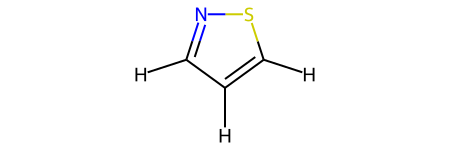

In [7]:
smi = 'C1=CSN=C1'
m = Chem.MolFromSmiles(smi)
mol = AllChem.AddHs(m)
mol

### Propriétés moléculaires 

In [8]:
molwt = Descriptors.ExactMolWt(mol) 
logP = Descriptors.MolLogP(mol) 
tpsa = Descriptors.TPSA(mol) 
hbd = Descriptors.NumHDonors(mol)
hba = Descriptors.NumHAcceptors(mol)

print(f'Our molecular properties are:\n Molecular weight:{molwt}, \n polarity:{tpsa}, \n solubility:{logP}, \n Hbd:{hbd}, \n Hba:{hba}')

Our molecular properties are:
 Molecular weight:84.998620096, 
 polarity:12.89, 
 solubility:1.1430999999999998, 
 Hbd:0, 
 Hba:2


In [1]:
import pandas as pd 

In [10]:
Descripteurs = [molwt,logP,tpsa,hbd,hba]

df = pd.DataFrame(Descripteurs,['molwt','logP','tpsa','hbd','hba'])
df

,0
molwt,84.99862
logP,1.14310
tpsa,12.89000
hbd,0.00000
hba,2.00000


## Question 1 

In [2]:
import pyscf

### Initailisation de la molécule

In [3]:
from pyscf import gto

mol=gto.Mole()
mol.atom= '''
  C      1.1291      0.0795     -0.5259
  C      0.7115     -1.2207     -0.4748
  H      2.0789      0.4171     -0.9381
  H      1.2719     -2.0822     -0.8377
  S     -0.0500      1.1306      0.1514
  N     -1.1147     -0.1822      0.5074
  C     -0.5926     -1.3347      0.1299
  H     -1.1422     -2.2662      0.2851 '''
mol.unit='AU'
mol.basis='6-311+G(d,p)'
mol.verbose=4
mol.spin=0
mol.charge=0
mol.build()

System: uname_result(system='Linux', node='elvira-Latitude-E6520', release='6.5.0-14-generic', version='#14~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Nov 20 18:15:30 UTC 2', machine='x86_64')  Threads 4
Python 3.10.9 (main, Mar  1 2023, 18:23:06) [GCC 11.2.0]
numpy 1.25.2  scipy 1.11.2
Date: Sat Jan 20 14:46:45 2024
PySCF version 2.3.0
PySCF path  /home/elvira/.local/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 8
[INPUT] num. electrons = 44
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = AU
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 C      0.597493988850   0.042069588268  -0.278294295223 AA    1.129100000000   0.079500000000  -0.525900000000 Bohr   0.0
[INPUT]  2 C      0.376509585570  -0.645966621370  -0.251253339745 AA    0.711500000000  -1.220700000000  -0.474

### Visualisation de la molécule en 3D

In [4]:
import py3Dmol

# 3D representation
xyz_view = py3Dmol.view(width=400,height=500)
xyz_view.addModel(mol.tostring(format="xyz"),'xyz')
xyz_view.setStyle({'stick':{}})
xyz_view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
print(f'Le nombre total d\'électrons est {mol.nelectron} et le nombre total d\'électrons (alpha, béta) est {mol.nelec}')
print(f'Le nombre d\'orbitales atomiques, dans la base {mol.basis}, est {mol.nao_nr()}')
print(f'L\'énergie nucléaire vaut {mol.energy_nuc()} Hartrees')

Le nombre total d'électrons est 44 et le nombre total d'électrons (alpha, béta) est (22, 22)
Le nombre d'orbitales atomiques, dans la base 6-311+G(d,p), est 136
L'énergie nucléaire vaut 384.633201834511 Hartrees


### Méthode DFT 

In [6]:
from pyscf import dft

/home/elvira/.local/lib/python3.10/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [7]:
mf = dft.RKS(mol)

In [8]:
mf.kernel()



******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/elvira/Documents/Thème de mémoire/Codes/tmp82zm_466
max_memory 4000 MB (current use 146 MB)
XC library pyscf.dft.libxc version 6.1.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = LDA,VWN
    P. A. M. Dirac.,  Math. Proc. Cambridge Philos. Soc. 26, 376 (1930)
    F. Bloch.,  Z. Phys. 57, 545 (1929)
    S. H. Vosko, L. Wilk, and M. Nusair.,  Can. J. Phys. 58, 1200 (1980)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x7f783a5

-555.9252919624416

In [9]:
mf.e_tot

-555.9252919624416

### Fonctionnelles

### Calcul du mean-field avec la fonctionnelle hybride "PBE"

In [10]:
mf.xc = 'PBE' 
mf_PBE = mf.kernel()
print(f'mf_PBE est {mf_PBE}')



******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/elvira/Documents/Thème de mémoire/Codes/tmp82zm_466
max_memory 4000 MB (current use 544 MB)
XC library pyscf.dft.libxc version 6.1.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = PBE
    J. P. Perdew, K. Burke, and M. Ernzerhof.,  Phys. Rev. Lett. 77, 3865 (1996)
    J. P. Perdew, K. Burke, and M. Ernzerhof.,  Phys. Rev. Lett. 78, 1396 (1997)
    J. P. Perdew, K. Burke, and M. Ernzerhof.,  Phys. Rev. Lett. 77, 3865 (1996)
    J. P. Perdew, K. Burke, and M. Ernzerhof.,  Phys. Rev. Lett. 78, 1396 (1997)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4)

### Calcul du mean-field avec la fonctionnelle hybride "TPSS"

In [12]:
mf.xc = 'TPSS' 
mf_TPSS = mf.kernel()
print(f'mf_TPSS est {mf_TPSS}')



******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/elvira/Documents/Thème de mémoire/Codes/tmp82zm_466
max_memory 4000 MB (current use 535 MB)
XC library pyscf.dft.libxc version 6.1.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = TPSS
    J. Tao, J. P. Perdew, V. N. Staroverov, and G. E. Scuseria.,  Phys. Rev. Lett. 91, 146401 (2003)
    J. P. Perdew, J. Tao, V. N. Staroverov, and G. E. Scuseria.,  J. Chem. Phys. 120, 6898 (2004)
    J. Tao, J. P. Perdew, V. N. Staroverov, and G. E. Scuseria.,  Phys. Rev. Lett. 91, 146401 (2003)
    J. P. Perdew, J. Tao, V. N. Staroverov, and G. E. Scuseria.,  J. Chem. Phys. 120, 6898 (2004)
radial gri

### Calcul du mean-field avec la fonctionnelle non-hybride "B3LYP"

In [13]:
mf.xc = 'B3LYP' 
mf_B3LYP = mf.kernel()
print(f'mf_B3LYP est {mf_B3LYP}')



******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/elvira/Documents/Thème de mémoire/Codes/tmp82zm_466
max_memory 4000 MB (current use 535 MB)
XC library pyscf.dft.libxc version 6.1.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = B3LYP
    P. J. Stephens, F. J. Devlin, C. F. Chabalowski, and M. J. Frisch.,  J. Phys. Chem. 98, 11623 (1994)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x7f783a535120>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: 

### Tableau récapitulatif des fontionnelles

In [14]:
Fonctionnelles = ['PBE','TPSS','B3LYP']
Énergies =[mf_PBE, mf_TPSS , mf_B3LYP] 
data = {
    "Fonctionnelles": Fonctionnelles ,  
    "Énergies": Énergies
}
df = pd.DataFrame(data)
df

,Fonctionnelles,Énergies
0,PBE,-558.246513
1,TPSS,-558.710414
2,B3LYP,-558.672636


## Question 2

### Méthode de MP2

In [15]:
from pyscf import scf

myhf = scf.RHF(mol)
myhf.kernel()



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/elvira/Documents/Thème de mémoire/Codes/tmpzt0pl52m
max_memory 4000 MB (current use 554 MB)
Set gradient conv threshold to 3.16228e-05
Initial guess from minao.
init E= -583.851943490155
  HOMO = -0.414796087529404  LUMO = -0.0288729478937801
cycle= 1 E= -555.924423131738  delta_E= 27.9  |g|= 2.47  |ddm|=   99
  HOMO = 0.027255658531869  LUMO = 0.0520849857655085
cycle= 2 E= -555.779761132745  delta_E= 0.145  |g|= 2.44  |ddm|= 1.29e+04
  HOMO = -0.354798818311093  LUMO = 0.0209644355094174
cycle= 3 E= -556.755260313135  delta_E= -0.975  |g|= 0.305  |ddm|= 1.29e+04
  HOMO = -0.309229099658563  LUMO = 0.0378623062196292
cycle= 4 E= -556.773169390361  del

-556.7743769645595

In [16]:
myhf.mo_occ

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
lumo1_idx = myhf.mo_occ.tolist().index(0.)
homo1_idx = lumo1_idx - 1
print(f'Les indexes du (HOMO,LUMO) sont {homo1_idx,lumo1_idx}')

Les indexes du (HOMO,LUMO) sont (21, 22)


In [18]:
import time

start = time.time()
myhf_time = time.time() - start

In [19]:
from pyscf import mp
import time

#myhf = dft.RKS(mol)
mf1 = mp.MP2(myhf)
mf1.kernel()

start = time.time()
mf1_time = time.time() - start + myhf_time


******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 22, nmo = 136
max_memory 4000 MB (current use 901 MB)
E(MP2) = -557.673701892953  E_corr = -0.899324928393655
E(SCS-MP2) = -557.630853086321  E_corr = -0.856476121761603
E_corr(same-spin) = -0.256977452666288
E_corr(oppo-spin) = -0.642347475727367


In [20]:
mf1.e_tot

-557.6737018929529

### Méthode CC

In [21]:
from pyscf import cc

start = time.time()
mf2 = cc.CCSD(myhf).run()


******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 22, nmo = 136
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 953 MB)
Init t2, MP2 energy = -557.673702074148  E_corr(MP2) -0.89932510958894
Init E_corr(CCSD) = -0.899325109595972
cycle = 1  E_corr(CCSD) = -0.883017574554078  dE = 0.016307535  norm(t1,t2) = 0.0613565
cycle = 2  E_corr(CCSD) = -0.900595954721305  dE = -0.0175783802  norm(t1,t2) = 0.0182624
cycle = 3  E_corr(CCSD) = -0.899858989093137  dE = 0.000736965628  norm(t1,t2) = 0.0136533
cycle = 4  E_corr(CCSD) = -0.900814289010372  dE = -0.000955299917  norm(t1,t2) = 0.0054669
cycle = 5  E_corr(CCSD) = -0.9010908801716  dE = -0.000276591161  norm(t1,t2) = 0.00258603
cycle = 6  E_corr(CCSD) = -0.900948311528183  dE = 0.000142568643  norm(t1,t2) = 0.00124604
cycle = 7  E_corr(CCSD) = -0.90087026617123  dE = 7.8045357e-05  norm(t1,t2) = 0.000452183


In [22]:
mf2_time = time.time() - start + myhf_time
mf2.e_tot

-557.6752913637857

### Méthode CCSDT

In [ ]:
e_ccsd_t = mf2.ccsd_t()
mf2t_time = time.time() - start + myhf_time

In [25]:
methods = ["DFT", "MP2", "CCSD", "CCSDT"]
energies = [mf.e_tot, mf1.e_tot, mf2.e_tot, mf2.e_tot + e_ccsd_t]
mf_times = [mf_time, mf1_time, mf2_time, mf2t_time]


In [44]:
df_Eies = pd.DataFrame({"Energy":energies, "Time":mf_times}, 
                        index=methods
)

df_Eies

,Energy,Time
DFT,-558.316287,0.000055
MP2,-557.065947,0.000097
CCSD,-557.072775,49.865633
CCSDT,-557.089266,90.502938


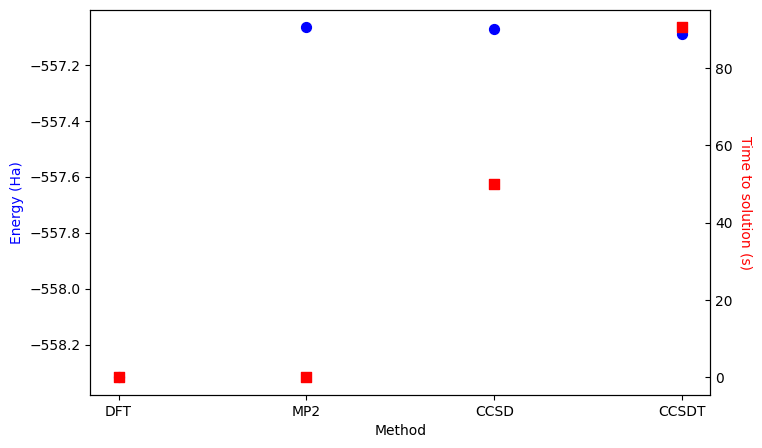

In [45]:
# Plotting
import matplotlib.pyplot as plt

# Create the matplotlib figure
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies
ax.set_xticks(range(len(methods)), methods)
ax.set_xlabel("Method")
ax.set_ylabel("Energy (Ha)", color="b")
ax.scatter(range(len(methods)), energies, marker="o", s=50, color="b")
ax.set_xlabel("Method")

# Plot the time to solution
ax_time = ax.twinx()
ax_time.scatter(range(len(methods)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")

# Show the graph
plt.tick_params(axis="both", direction="in")
plt.show()

#### Question 3

In [11]:
import os
import numpy as np
from pyscf.data import nist

au2ev = nist.HARTREE2EV

# Calculate the gap Homo-LUMO
E_HOMO = myhf.mo_energy[homo1_idx]*au2ev
E_LUMO = myhf.mo_energy[lumo1_idx]*au2ev
E_g = abs(E_HOMO - E_LUMO)

print(f'Les différentes énergies sont:\n Energie HOMO:{E_HOMO} eV, \n Energie LUMO:{E_LUMO} eV, \n Energie de GAP:{E_g} eV')

Les différentes énergies sont:
 Energie HOMO:-8.772029388164842 eV, 
 Energie LUMO:1.068354969266567 eV, 
 Energie de GAP:9.84038435743141 eV


In [12]:
from pyscf import tddft

mytda = tddft.TDA(myhf)
mytda.kernel()
mytda.analyze(verbose=4)

/home/elvira/.local/lib/python3.10/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '




******** <class 'pyscf.tdscf.rhf.TDA'> for <class 'pyscf.scf.hf.RHF'> ********
nstates = 3 singlet
wfnsym = None
conv_tol = 1e-09
eigh lindep = 1e-12
eigh level_shift = 0
eigh max_space = 50
eigh max_cycle = 100
chkfile = /home/elvira/Documents/Thème de mémoire/Codes/tmpd61q8rfn
max_memory 4000 MB (current use 509 MB)


Excited State energies (eV)
[5.1860713  5.21074999 5.85777853]

** Singlet excitation energies and oscillator strengths **
Excited State   1:      5.18607 eV    239.07 nm  f=0.0006
      21 -> 24        0.30173
      21 -> 39        0.14112
      22 -> 24        0.55580
      22 -> 39        0.23939
Excited State   2:      5.21075 eV    237.94 nm  f=0.0171
      21 -> 23        0.28015
      21 -> 25        0.17427
      22 -> 23        0.49199
      22 -> 25        0.25167
      22 -> 32       -0.10548
      22 -> 33        0.13752
Excited State   3:      5.85778 eV    211.66 nm  f=0.0236
      21 -> 23        0.52275
      21 -> 27       -0.11230
      21 -> 33     

In [13]:
# Singlet excitation energies
ee_singlets = mytda.e

# Singlet oscillators strength
OS_singlets = mytda.oscillator_strength(gauge='length')

In [14]:
mytda.singlet = False
mytda.kernel()
mytda.analyze(verbose=4)

# Triplet excitation energies
ee_triplets = mytda.e



******** <class 'pyscf.tdscf.rhf.TDA'> for <class 'pyscf.scf.hf.RHF'> ********
nstates = 3 triplet
wfnsym = None
conv_tol = 1e-09
eigh lindep = 1e-12
eigh level_shift = 0
eigh max_space = 50
eigh max_cycle = 100
chkfile = /home/elvira/Documents/Thème de mémoire/Codes/tmpd61q8rfn
max_memory 4000 MB (current use 513 MB)


Excited State energies (eV)
[4.92024077 5.01604911 5.27595482]

** Triplet excitation energies and oscillator strengths **
Excited State   1:      4.92024 eV    251.99 nm  f=0.0315
      21 -> 23       -0.24123
      21 -> 25       -0.19710
      22 -> 23       -0.46187
      22 -> 25       -0.27954
      22 -> 32        0.11630
      22 -> 33       -0.14708
      22 -> 42       -0.11503
Excited State   2:      5.01605 eV    247.18 nm  f=0.0019
      21 -> 24        0.20771
      21 -> 39        0.10081
      22 -> 24        0.58139
      22 -> 39        0.27976
Excited State   3:      5.27595 eV    235.00 nm  f=0.1626
      21 -> 24        0.56529
      21 -> 39     

In [15]:
# fluorescence energy
f_energy = min(ee_singlets)

# Singlet-Tiplet gap
gap_ST = min(ee_singlets) - min(ee_triplets)

# Oscillator strength
OStr = OS_singlets[0]

# Lifetime calculation in au
c = nist.LIGHT_SPEED # in au
time_au = 2.4188843265857E-17 # in au

tau_au = c**3 / (2 * (f_energy)**2 * OStr) # in au
tau = tau_au * time_au # in seconds

# Multi-Objective function
mobj = OStr - gap_ST * au2ev - np.abs(f_energy * au2ev - 3.2)


In [16]:
# Create the results dataframe
list_results_TDA = [E_HOMO, E_LUMO, E_g, f_energy* au2ev, gap_ST* au2ev, OStr, tau* 1E+9, mobj]
dict_results_TDA = {'eV/ns': list_results_TDA}

df_TDA = pd.DataFrame(dict_results_TDA,
                    index = ['Homo energy', 'LUMO energy', 'Gap energy', 
                             'Fluorescence energy',
                             'Singlet-Triplet gap',
                             'Oscillator strength',
                             'Lifetime',
                             'Multi-Obj'])

df_TDA

,eV/ns
Homo energy,-8.772029
LUMO energy,1.068355
Gap energy,9.840384
Fluorescence energy,5.186071
Singlet-Triplet gap,0.265831
Oscillator strength,0.000575
Lifetime,1488.948356
Multi-Obj,-2.251326


## Question 4

#### Traçons le spectre UV/Vis avec les trois fonctionnelles précédentes

In [32]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


In [33]:
def run_spectral_analysis(mol, xc="lda"):
    n_states=15
    spectral_width=0.1

    # Ground State DFT
    mf = dft.RKS(mol, xc=xc).run()

    # Excited State DFT
    mytd = tddft.TDDFT(mf)
    mytd.nstates = n_states
    mytd.max_space = 100
    mytd.max_cycle = 200
    mytd.kernel();
    mytd.analyze()
    osc_strengths = mytd.oscillator_strength()[:n_states-5]

    # Convolve lineshapes to make spectra
    energies_ev = mytd.e[:n_states-5]*au2ev
    x_range = np.linspace(energies_ev.min()*0.9, energies_ev.max()*1.1, num=1000)
    intensity = np.zeros(x_range.size)

    for e, f in zip(energies_ev, osc_strengths):
        intensity += gaussian(x_range, e, spectral_width) * f

    # Rough Normalization
    dx = (x_range[-1] - x_range[0])/x_range.size
    area = (intensity*dx).sum()
    intensity /= area


    return x_range, intensity

In [34]:
data = {"Excitation Energy (eV)":[], "Intensity":[], "Exchange-Correlation Functional":[]}

xcs = ["PBE", "TPSS", "B3LYP"]

for xc in xcs:
    ti = time.time()
    x_range, intensity = run_spectral_analysis(mol, xc=xc)

    data["Excitation Energy (eV)"] += x_range.tolist()
    data["Intensity"] += intensity.tolist()
    data["Exchange-Correlation Functional"] += [xc]*x_range.size
    tf = time.time()
    print(f"Time for {xc.upper()} calculations: {tf-ti:.2f}\n")

df = pd.DataFrame(data)



******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/elvira/Documents/Thème de mémoire/Codes/tmpnfcrzr23
max_memory 4000 MB (current use 666 MB)
XC library pyscf.dft.libxc version 6.1.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = PBE
    J. P. Perdew, K. Burke, and M. Ernzerhof.,  Phys. Rev. Lett. 77, 3865 (1996)
    J. P. Perdew, K. Burke, and M. Ernzerhof.,  Phys. Rev. Lett. 78, 1396 (1997)
    J. P. Perdew, K. Burke, and M. Ernzerhof.,  Phys. Rev. Lett. 77, 3865 (1996)
    J. P. Perdew, K. Burke, and M. Ernzerhof.,  Phys. Rev. Lett. 78, 1396 (1997)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4)

In [37]:
import plotly.express as px
fig = px.line(df, x="Excitation Energy (eV)", y="Intensity", markers=True, color="Exchange-Correlation Functional")
fig.show()